In [3]:
import pandas as pd
Sig_Eqs = pd.read_csv('/Users/violetxu/Documents/Jupyter/Sig_Eqs.tsv',sep= '\t' )
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6269,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN
6270,NaN,2021.0,10.0,6.0,22.0,1.0,8.0,NaN,NaN,PAKISTAN,...,NaN,NaN,229.0,3.0,NaN,2.0,NaN,3.0,NaN,2.0
6271,NaN,2021.0,10.0,12.0,9.0,24.0,3.0,5817.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [4]:
# question 1——1
met = Sig_Eqs.groupby('Country')['Deaths'].sum()
met = met.sort_values(ascending=False)[0:10]
met

Country
CHINA         2074900.0
TURKEY        1074569.0
IRAN          1011437.0
SYRIA          439224.0
ITALY          434863.0
HAITI          323472.0
AZERBAIJAN     317219.0
JAPAN          278138.0
ARMENIA        191890.0
PAKISTAN       148783.0
Name: Deaths, dtype: float64

In [5]:
#question 1——2
from matplotlib import pyplot as plt
met1 = Sig_Eqs.loc[Sig_Eqs['Mag'] > 6.0].groupby(['Year'])['Mag'].count()
met1

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2017.0    32
 2018.0    28
 2019.0    27
 2020.0    15
 2021.0    18
Name: Mag, Length: 530, dtype: int64

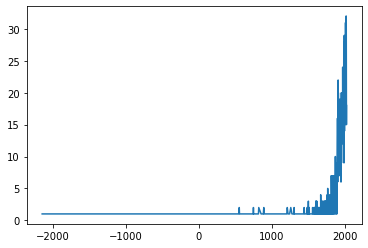

In [10]:
plt.plot(met1)
plt.show()

In [6]:
#question 1——3
def CountEq_LargestEq(CountryName):
    tmp = Sig_Eqs.loc[Sig_Eqs['Country'] == CountryName]
    ResCount = tmp.count()['Location Name']
    if not tmp.empty:
        maxrow = tmp['Mag'].argmax()
        ResDate = tmp.iloc[maxrow, 1:4]
        return ResCount, DateToString(ResDate)
    else:
        return ResCount, ''
def DateToString(DF_Date):
    tmp = ''
    for i in range(3):
        if math.isnan(DF_Date[i]):
            tmp += ' '
        else:
            tmp += str(int(DF_Date[i]))
        tmp += '/'
    return tmp[:-1]

In [7]:
import math

CountryList = Sig_Eqs['Country'].drop_duplicates(keep='first')
CountryList = CountryList.reset_index(drop=True)
#(CountryList)

col = ['Country', 'CountEq', 'LargestEqDate']
# R1, R2 = CountEq_LargestEq('CHINA')
met2 = pd.DataFrame(columns=col)

for i in range(1, CountryList.size):
    R1, R2 = CountEq_LargestEq(CountryList[i])
    new_row = {'Country': CountryList[i], 'CountEq': R1, 'LargestEqDate': R2}
    met2 = met2.append(new_row, ignore_index=True)
met2 = met2.sort_values(['CountEq'], ascending=[0])
met2

,Country,CountEq,LargestEqDate
14,CHINA,610,1668/7/25
32,JAPAN,409,2011/3/11
68,INDONESIA,401,2004/12/26
7,IRAN,380,856/12/22
9,TURKEY,330,1916/1/24
...,...,...,...
93,NORWAY,1,1819/8/31
126,CENTRAL AFRICAN REPUBLIC,1,1921/9/16
124,PALAU,1,1914/10/23
118,KIRIBATI,1,1905/6/30
